# sourmash: working with private collections of signatures

### Running this notebook.

You can run this notebook interactively via mybinder; click on this button:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/dib-lab/sourmash/master?filepath=doc%2Fsourmash-collections.ipynb)

A rendered version of this notebook is available at [sourmash.readthedocs.io](https://sourmash.readthedocs.io) under "Tutorials and notebooks".

You can also get this notebook from the [doc/ subdirectory of the sourmash github repository](https://github.com/dib-lab/sourmash/tree/master/doc). See [binder/environment.yaml](https://github.com/dib-lab/sourmash/blob/master/binder/environment.yml) for installation dependencies.

### What is this?

This is a Jupyter Notebook using Python 3. If you are running this via [binder](https://mybinder.org), you can use Shift-ENTER to run cells, and double click on code cells to edit them.

Contact: C. Titus Brown, ctbrown@ucdavis.edu. Please [file issues on GitHub](https://github.com/dib-lab/sourmash/issues/) if you have any questions or comments!

## download a bunch of genomes

In [1]:
!mkdir -p big_genomes
!curl -L https://osf.io/8uxj9/?action=download | (cd big_genomes && tar xzf -)

/Users/t/dev/sourmash/doc/big_genomes
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0    750      0 --:--:-- --:--:-- --:--:--   750
100 61.1M  100 61.1M    0     0  2966k      0  0:00:21  0:00:21 --:--:-- 3496k


## compute signatures for each file

In [2]:
!cd big_genomes/ && sourmash compute -k 31 --scaled=1000 --name-from-first *.fa

/Users/t/dev/sourmash/doc/big_genomes
== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

setting num_hashes to 0 because --scaled is set
computing signatures for files: 0.fa, 1.fa, 10.fa, 11.fa, 12.fa, 13.fa, 14.fa, 15.fa, 16.fa, 17.fa, 18.fa, 19.fa, 2.fa, 20.fa, 21.fa, 22.fa, 23.fa, 24.fa, 25.fa, 26.fa, 27.fa, 28.fa, 29.fa, 3.fa, 30.fa, 31.fa, 32.fa, 33.fa, 34.fa, 35.fa, 36.fa, 37.fa, 38.fa, 39.fa, 4.fa, 40.fa, 41.fa, 42.fa, 43.fa, 44.fa, 45.fa, 46.fa, 47.fa, 48.fa, 49.fa, 5.fa, 50.fa, 51.fa, 52.fa, 53.fa, 54.fa, 55.fa, 56.fa, 57.fa, 58.fa, 59.fa, 6.fa, 60.fa, 61.fa, 62.fa, 63.fa, 7.fa, 8.fa, 9.fa
Computing signature for ksizes: [31]
Computing only nucleotide (and not protein) signatures.
Computing a total of 1 signature(s).
... reading sequences from 0.fa
calculated 1 signatures for 1 sequences in 0.fa
saved 1 signature(s). Note: signature license is CC0.
... reading sequences from 1.fa
calculated 1 signatures f

calculated 1 signatures for 1 sequences in 55.fa
saved 1 signature(s). Note: signature license is CC0.
... reading sequences from 56.fa
calculated 1 signatures for 1 sequences in 56.fa
saved 1 signature(s). Note: signature license is CC0.
... reading sequences from 57.fa
calculated 1 signatures for 1 sequences in 57.fa
saved 1 signature(s). Note: signature license is CC0.
... reading sequences from 58.fa
calculated 1 signatures for 30 sequences in 58.fa
saved 1 signature(s). Note: signature license is CC0.
... reading sequences from 59.fa
calculated 1 signatures for 5 sequences in 59.fa
saved 1 signature(s). Note: signature license is CC0.
... reading sequences from 6.fa
calculated 1 signatures for 76 sequences in 6.fa
saved 1 signature(s). Note: signature license is CC0.
... reading sequences from 60.fa
calculated 1 signatures for 11 sequences in 60.fa
saved 1 signature(s). Note: signature license is CC0.
... reading sequences from 61.fa
calculated 1 signatures for 47 sequences in 61.

## Compare them all

In [3]:
!sourmash compare big_genomes/*.sig -o compare_all.mat
!sourmash plot compare_all.mat

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 64 signatures total.                                                    
downsampling to scaled value of 1000

min similarity in matrix: 0.000
saving labels to: compare_all.mat.labels.txt
saving distance matrix to: compare_all.mat
== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loading comparison matrix from compare_all.mat...
...got 64 x 64 matrix.
loading labels from compare_all.mat.labels.txt
saving histogram of matrix values => compare_all.mat.hist.png
wrote dendrogram to: compare_all.mat.dendro.png
wrote numpy distance matrix to: compare_all.mat.matrix.png


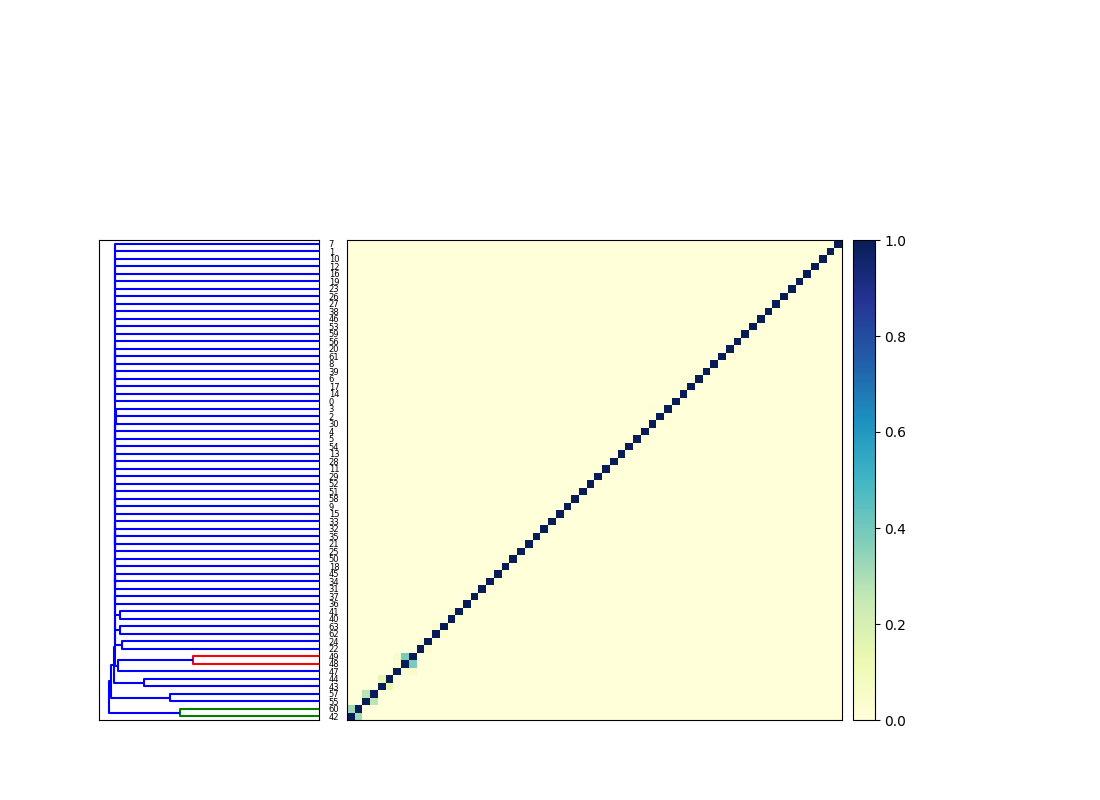

In [4]:
from IPython.display import Image
Image(filename='compare_all.mat.matrix.png') 

## make a fast(er) search database for all of them

In [5]:
!sourmash index -k 31 all-genomes big_genomes/*.sig

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loading 64 files into SBT
reading from big_genomes/9.fa.sig (63 signatures so far))
loaded 64 sigs; saving SBT under "all-genomes"
127 of 127 nodes saved
Finished saving nodes, now saving SBT json file.


You can now use this to search, and gather.

In [6]:
!sourmash search shew_os185.fa.sig all-genomes --threshold=0.001

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

selecting default query k=31.
loaded query: NC_009665.1 Shewanella baltica... (k=31, DNA)
loaded 1 databases.                                                            

2 matches:
similarity   match
----------   -----
  9.5%       NC_009665.1 Shewanella baltica OS185, complete genome
  4.4%       NC_011663.1 Shewanella baltica OS223, complete genome


In [7]:
# (make fake metagenome again, just in case)
!cat genomes/*.fa > fake-metagenome.fa
!sourmash compute -k 31 --scaled=1000 fake-metagenome.fa

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

setting num_hashes to 0 because --scaled is set
computing signatures for files: fake-metagenome.fa
Computing signature for ksizes: [31]
Computing only nucleotide (and not protein) signatures.
Computing a total of 1 signature(s).
skipping fake-metagenome.fa - already done


In [8]:
!sourmash gather fake-metagenome.fa.sig all-genomes

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

select query k=31 automatically.
loaded query: fake-metagenome.fa... (k=31, DNA)
loaded 1 databases.                                                            


overlap     p_query p_match
---------   ------- -------
0.5 Mbp       42.2%   10.5%    NC_011663.1 Shewanella baltica OS223,...
499.0 kbp     38.4%   18.5%    CP001071.1 Akkermansia muciniphila AT...
0.5 Mbp       19.4%    4.9%    NC_009665.1 Shewanella baltica OS185,...

found 3 matches total;
the recovered matches hit 100.0% of the query



# build a database with taxonomic information --

for this, we need to provide a metadata file that contains accession => tax information.

In [9]:
import pandas
df = pandas.read_csv('podar-lineage.csv')
df

,accession,taxid,superkingdom,phylum,class,order,family,genus,species,strain
0,AE000782,224325,Archaea,Euryarchaeota,Archaeoglobi,Archaeoglobales,Archaeoglobaceae,Archaeoglobus,Archaeoglobus fulgidus,Archaeoglobus fulgidus DSM 4304
1,NC_000909,243232,Archaea,Euryarchaeota,Methanococci,Methanococcales,Methanocaldococcaceae,Methanocaldococcus,Methanocaldococcus jannaschii,Methanocaldococcus jannaschii DSM 2661
2,NC_003272,103690,Bacteria,Cyanobacteria,NaN,Nostocales,Nostocaceae,Nostoc,Nostoc sp. PCC 7120,NaN
3,AE009441,178306,Archaea,Crenarchaeota,Thermoprotei,Thermoproteales,Thermoproteaceae,Pyrobaculum,Pyrobaculum aerophilum,Pyrobaculum aerophilum str. IM2
4,AE009950,186497,Archaea,Euryarchaeota,Thermococci,Thermococcales,Thermococcaceae,Pyrococcus,Pyrococcus furiosus,Pyrococcus furiosus DSM 3638
5,AE009951,190304,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Fusobacteriaceae,Fusobacterium,Fusobacterium nucleatum,NaN
6,AE010299,188937,Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,Methanosarcina,Methanosarcina acetivorans,Methanosarcina acetivorans C2A
7,AE009439,190192,Archaea,Euryarchaeota,Methanopyri,Methanopyrales,Methanopyraceae,Methanopyrus,Methanopyrus kandleri,Methanopyrus kandleri AV19
8,NC_003911,246200,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Ruegeria,Ruegeria pomeroyi,Ruegeria pomeroyi DSS-3
9,AE006470,194439,Bacteria,Chlorobi,Chlorobia,Chlorobiales,Chlorobiaceae,Chlorobaculum,Chlorobaculum tepidum,Chlorobaculum tepidum TLS


In [10]:
!sourmash lca index podar-lineage.csv taxdb big_genomes/*.sig  -C 3 --split-identifiers

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

examining spreadsheet headers...
** assuming column 'accession' is identifiers in spreadsheet
64 distinct identities in spreadsheet out of 64 rows.
64 distinct lineages in spreadsheet out of 64 rows.
64 assigned lineages out of 64 distinct lineages in spreadsheet. 64)
64 identifiers used out of 64 distinct identifiers in spreadsheet.
saving to LCA DB: taxdb.lca.json


This database 'taxdb.lca.json' can be used for search and gather as above:

In [11]:
!sourmash gather fake-metagenome.fa.sig taxdb.lca.json

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

select query k=31 automatically.
loaded query: fake-metagenome.fa... (k=31, DNA)
loaded 1 databases.                                                            


overlap     p_query p_match
---------   ------- -------
0.6 Mbp       46.7%   11.6%    NC_011663.1 Shewanella baltica OS223,...
0.5 Mbp       38.7%   19.3%    CP001071.1 Akkermansia muciniphila AT...
0.5 Mbp       14.6%    3.9%    NC_009665.1 Shewanella baltica OS185,...

found 3 matches total;
the recovered matches hit 100.0% of the query



...but can also be used for taxonomic summarization:

In [12]:
!sourmash lca summarize --query fake-metagenome.fa.sig --db taxdb.lca.json

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 1 LCA databases. ksize=31, scaled=10000
finding query signatures...
loaded 1 signatures from 1 files total.of 1)
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia;Akkermansia muciniphila;Akkermansia muciniphila ATCC BAA-835
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia;Akkermansia muciniphila
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae
38.7%    53   Bacteria;Verrucomicrobia
100.0%   137   Bacteria
61.3%    84   Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;She

## A full list of notebooks

[An introduction to k-mers for genome comparison and analysis](kmers-and-minhash.ipynb)

[Some sourmash command line examples!](sourmash-examples.ipynb)

[Working with private collections of signatures.](sourmash-collections.ipynb)